# Grid Based Clustering

What is Clustering?
Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. It is an exploratory data mining activity, and a common technique for statistical data analysis used in many fields including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics

Grid-Based Clustering concept:

The grid-based clustering methods use a multi-resolution grid data structure. It quantizes the object areas into a finite number of cells that form a grid structure on which all of the operations for clustering are implemented. The benefit of the method is its quick processing time, which is generally independent of the number of data objects, still dependent on only the multiple cells in each dimension in the quantized space.

The grid-based clustering uses a multi-resolution grid data structure and uses dense grid cells to form clusters. There are several interesting methods:- STING, wave cluster, and CLIQUE(Clustering in Quest).

CLIQUE automatically finds subspaces with high-density clusters. It produces identical results irrespective of the order in which the input records are presented and it does not presume any canonical distribution for input data [1].

Here is an example where data in two-dimensional space is clustered using the CLIQUE algorithm:

In [ ]:
pip install pyclustering==0.10.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 115.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=e79d2c933a620a1fecc2aef5107a0a3b312711f5730ff26b4b3872c62bce80ba
  Stored in directory: /root/.cache/pip/wheels/e0/56/c2/abb6866a3fcd8a55862f1df8a18f57805c3a78fed9a9023cb9
Successfully built pyclustering
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Amount of clusters: 6


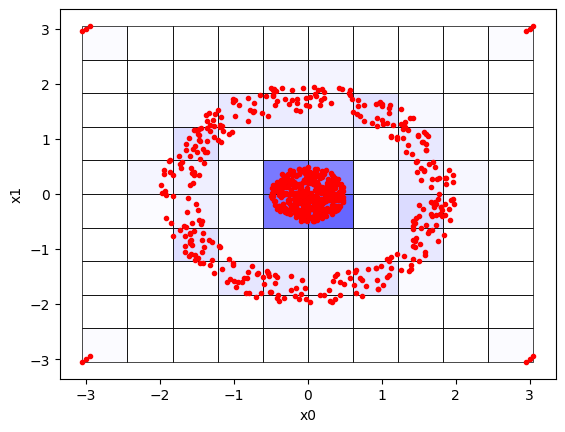

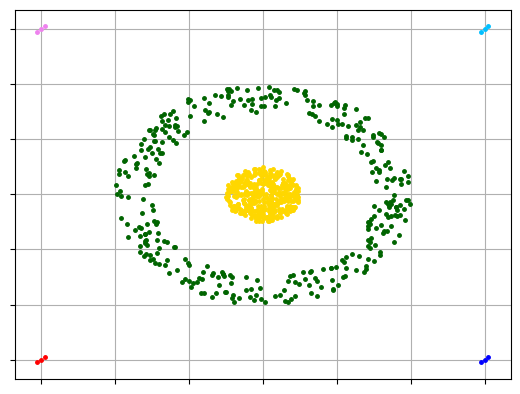

In [ ]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

# read two-dimensional input data 'Target'
data = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)

# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

In this example, 6 clusters are allocated including four small cluster where each such small cluster consists of three points. There are visualized clustering results - grid that has been formed by CLIQUE algorithm with density and clusters itself:

Two clusters are allocated, but in this case some points in cluster-"circle" are also considered as outliers, because CLIQUE operates with blocks, not with points:

Amount of clusters: 2


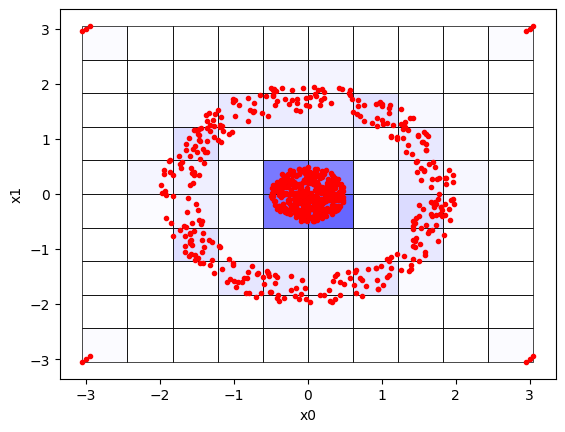

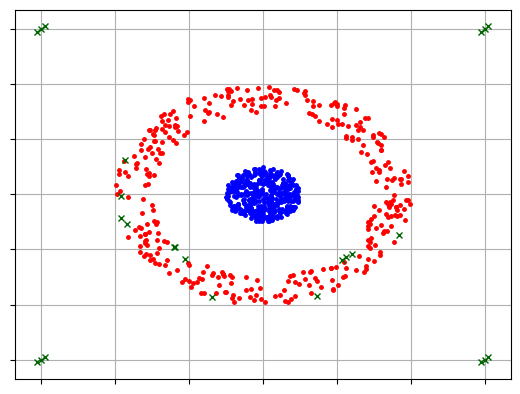

In [ ]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

intervals = 10
threshold = 3   # block that contains 3 or less points is considered as a outlier as well as its points
clique_instance = clique(data, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

Grid Based Clustering by Bhawneet Singh is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).